# Исследование данных сервиса аренды самокатов GoFast

**Описание проекта**

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

**Цель проекта**

Провести комплексный анализ данных сервиса аренды самокатов GoFast с целью выявления закономерностей, проверки гипотез и разработки рекомендаций для бизнеса.

**Задачи проекта**

1. Понять, тратят ли пользователи с подпиской больше времени на поездки?
2. Выяснить, не превышает ли среднее растояние, которое проезжают пользователи с подпиской за одну поездку, 3130 метров?
3. Проверить, будет ли помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки?
4. Выбрать тест для проверки гипотезы о снижении количества обращений в тех поддержку до обновления приложения и после него.

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.<br/>

Пользователи — 'users_go.csv'<br/>
- *user_id* - уникальный идентификатор пользователя<br/>
- *name* - имя пользователя<br/>
- *age* - возраст<br/>
- *city* - город<br/>
- *subscription_type* - тип подписки (free, ultra)<br/>

Поездки — 'rides_go.csv'<br/>
- *user_id* - уникальный идентификатор пользователя<br/>
- *distance* - расстояние, которое пользователь проехал в текущей сессии (в метрах)<br/>
- *duration* - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»<br/>
- *date* - дата совершения поездки<br/>

Подписки — 'subscriptions_go.csv'<br/>
- *subscription_type* - тип подписки
- *minute_price* - стоимость одной минуты поездки по данной подписке
- *start_ride_price* - стоимость начала поездки
- *subscription_fee* - стоимость ежемесячного платежа

**Подключим библиотеки**

In [ ]:
# Импортируем необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Загрузка данных

#### Считаем CSV-файлы с данными

In [ ]:
# Загружаем датафреймы.
df_users = pd.read_csv('/datasets/users_go.csv')
df_rides = pd.read_csv('/datasets/rides_go.csv')
df_subs = pd.read_csv('/datasets/subscriptions_go.csv')

#### Изучим общую информацию о датафреймах

**df_users:**

In [ ]:
# Выведем первые строки.
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [ ]:
# Выведем общую информацию о датафрейме.
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
# Краткий обзор числовых данных датафрейма.
df_users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Датафрейм *df_users* состоит из 5 столбцов и 1565 записей. В данных отсутствуют пропуски.

**df_rides:**

In [ ]:
# Выведем первые строки.
df_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
# Выведем общую информацию о датафрейме.
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [ ]:
# Краткий обзор числовых данных датафрейма.
df_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Датафрейм *df_rides* состоит из 4 столбцов и 18068 записей. В данных отсутствуют пропуски. Поле *date* имеет тип данных *object*.

**df_subs:**

In [ ]:
# Выведем первые строки.
df_subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
# Выведем общую информацию о датафрейме.
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Датафрейм *df_subs* состоит из 4 столбцов и 2 записей.

**Вывод:**<br/>
В загруженных данных отстутствуют пропущенные значения.<br/>
Имена столбцов соответствуют стилю написания snake_case.<br/>
Поле *date* имеет тип данных *object*.

### Предобработка данных

#### Проверим датафреймы на наличие дубликатов и пропусков

**df_users:**

In [ ]:
# Проверим датафрейм на пропуски.
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков не обнаружено

In [ ]:
# Проверим датафрейм на явные дубликаты.
df_users.duplicated().sum()

31

In [ ]:
# Удалим явные дубликаты.
df_users = df_users.drop_duplicates()
df_users.duplicated().sum()

0

Явные дубликаты удалены

**df_rides:**

In [ ]:
# Проверим датафрейм на пропуски.
df_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Пропусков не обнаружено

In [ ]:
# Проверим датафрейм на явные дубликаты.
df_rides.duplicated().sum()

0

Явных дубликатов не обнаружено

**df_subs:**<br/>
Состоит из двух записей.<br/>
Пропусков и дубликатов — нет

#### Изменим тип данных столбцов

**df_rides:**

In [ ]:
# Изменим тип данных столбца date на datetime
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

#### Создадим новый столбец с номером месяца на основе столбца date

In [ ]:
df_rides['month'] = df_rides['date'].dt.month
df_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [ ]:
print(f"В данных имеются записи с {df_rides['date'].min()} по {df_rides['date'].max()}")

В данных имеются записи с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


**ВЫВОД ПО РАЗДЕЛУ:**<br/>
В процессе предобработки данных:<br/>
- Обнаружили и удалили явные дубликаты в датафрейме *df_users*
- Изменили тип данныв столбца *date* датафрейма *df_rides* на *datetime*
- Добавили новый столбец в *df_rides* с номером месяца на основе столбца *date*

Пропусков, неявных дубликатов и названий столбцов с некорректным написание обнаружено не было.

### Исследовательский анализ данных

#### Частота встречаемости городов

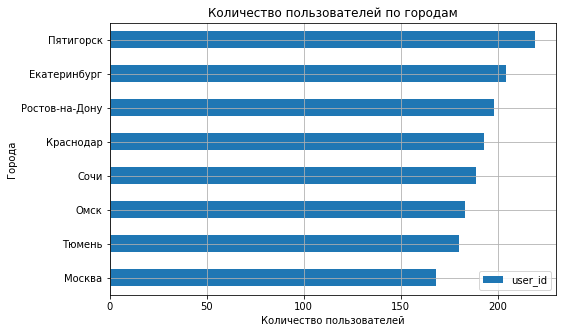

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [ ]:
df_users_city = df_users.pivot_table(index='city', values='user_id', aggfunc='count')
df_users_city = df_users_city.sort_values(by='user_id', ascending=True)
df_users_city.plot(kind='barh', figsize=(8, 5), grid=True )
plt.title('Количество пользователей по городам')
plt.ylabel('Города')
plt.xlabel('Количество пользователей')
plt.show()

df_users['city'].value_counts()

**Вывод:**
В датафреймах содержатся данные о пользователях сервиса из 8 городов.
Больше всего пользователей в Пятигорске (219).
Меньше всего пользователей в Москве (168).

#### Соотношение пользователей с подпиской и без подписки

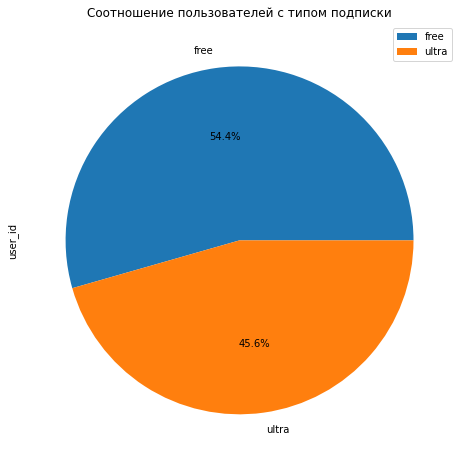

,user_id
subscription_type,
free,835
ultra,699


In [ ]:
df_users_subs = df_users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
df_users_subs.plot(kind='pie', y='user_id', labels=df_users_subs.index, autopct='%1.1f%%', figsize=(8, 8))
plt.title('Соотношение пользователей с типом подписки')
plt.show()
df_users_subs

**Вывод:**
- Больше всего пользователей с подпиской "free" — 835
- С подпиской "ultra" — 699

####  Возраст пользователей

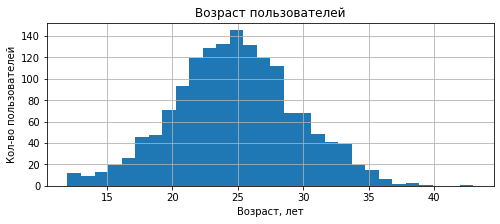

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [ ]:
df_users['age'].plot(kind='hist', grid=True, figsize=(8, 3), bins=30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Кол-во пользователей')
plt.show()
df_users['age'].describe()

**Вывод:**<br/>
Средний возраст пользователей сервиса составляет 24,9. Возраст пользователей представлен в диапазоне от 12 до 43 лет. Выборка имеет нормальное распределение. При этом медиана и средний возраст практически совпадают — 25 лет.

#### Расстояние, которое пользователь преодолел за одну поездку

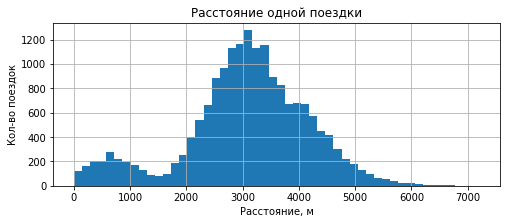

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [ ]:
df_rides['distance'].plot(kind='hist', grid=True, figsize=(8, 3), bins=50)
plt.title('Расстояние одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во поездок')
plt.show()
df_rides['distance'].describe()

In [ ]:
print(df_rides.query('distance > 0 and distance < 700'))

       user_id    distance   duration       date  month
100         10  680.952663   5.150377 2021-02-21      2
149         15  634.891669  15.809350 2021-04-05      4
153         15  671.851433  12.031109 2021-11-15     11
197         21  518.341543  10.151870 2021-02-03      2
204         21  517.912395  14.219625 2021-10-01     10
...        ...         ...        ...        ...    ...
18018     1531  375.107762   5.406654 2021-06-27      6
18031     1532  303.787850   7.792490 2021-05-21      5
18037     1532  662.468186   9.528773 2021-11-18     11
18043     1533  310.488247  10.642389 2021-02-21      2
18058     1534  195.447469   6.469074 2021-06-11      6

[924 rows x 5 columns]


**Вывод:**<br/>
За одну поездку пользователи преодолевают расстояние от 1 м до 7211 м.
В данных наблюдается два пика, один в районе 600 м, второй около 3100 м.
Среднее расстояние, преодолеваемое за одну поездку составляет примерно 3 километра. Медиана 3134 м. Значения между пиками распределены нормально. Малый пик в районе 600 метров может свидетельствовать о том, что пользователи используют поездки на самокатах, даже на короткие расстояния, от дома до магазина, до метро и т.д. Основная же масса поездок приходится на расстояния в диапазоне 2,5 до 3,5 км.

#### Продолжительность поездок

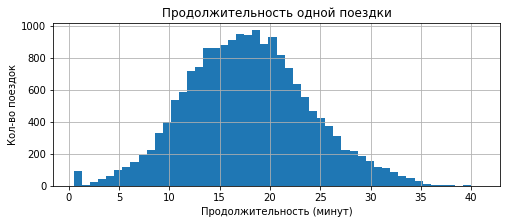

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [ ]:
df_rides['duration'].plot(kind='hist', grid=True, figsize=(8,3), bins=50)
plt.title('Продолжительность одной поездки')
plt.xlabel('Продолжительность (минут)')
plt.ylabel('Кол-во поездок')
plt.show()
df_rides['duration'].describe()

В данных наблюдается пик с аномально маленькими значениями продолжительности поездки.

In [ ]:
# Проверим аномальные значения
print(df_rides.query('duration < 0.6'))

       user_id     distance  duration       date  month
6531       701  4196.445201       0.5 2021-08-31      8
6570       704  4830.824371       0.5 2021-10-14     10
6680       712  4684.004397       0.5 2021-03-04      3
6695       713  5215.642710       0.5 2021-02-25      2
6768       718  5197.436649       0.5 2021-02-11      2
...        ...          ...       ...        ...    ...
17004     1460  5531.335845       0.5 2021-01-19      1
17242     1477  6724.932981       0.5 2021-01-12      1
17314     1483  4445.481070       0.5 2021-03-06      3
17505     1496  5722.551787       0.5 2021-02-14      2
17909     1524  4103.998874       0.5 2021-06-18      6

[95 rows x 5 columns]


95 записей в данных с очень короткой продолжительностью в пол минуты имеют аномально большие расстояния поездок. Считаю, что причиной послужил технический сбой при записи или выгрузке данных. Удалим аномальные строки с аномальными значениями.

In [ ]:
# Выведем исходное количество строк до удаления.
df_rides.shape

(18068, 5)

In [ ]:
# Отфильтруем данные удалив строки с аномальными значениями.
df_rides = df_rides.query('duration != 0.5')

In [ ]:
# Количество строк после удаления
df_rides.shape

(17973, 5)

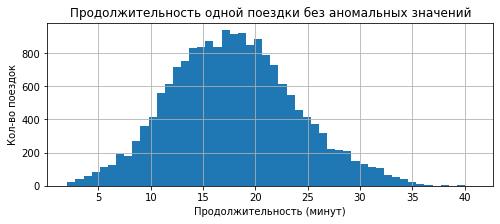

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

In [ ]:
df_rides['duration'].plot(kind='hist', grid=True, figsize=(8,3), bins=50)
plt.title('Продолжительность одной поездки без аномальных значений')
plt.xlabel('Продолжительность (минут)')
plt.ylabel('Кол-во поездок')
plt.show()
df_rides['duration'].describe()

**Вывод:**<br/>
Продолжительность одной поездки нормально распределена от 2 ло 41 минуты. Среднее и медианные значения находятся в районе 18 минут и являются наиболее распространенными. В данных присутствовали записи поездок с продолжительностью 0.5 минут и аномально большими расстояниями поездок. Было принято решение удалить 95 записей с аномалиями.

**ВЫВОД ПО РАЗДЕЛУ**<br/>
Максимальное количество пользователей сервиса представлено в городе Пятигорск — 219. Минимальное в Москве — 168.<br/>
Большинство пользователей пользуются подпиской 'free' — 835. С подпиской 'ultra' — 699.<br/>
Средний возраст пользователя составляет 25 лет. При этом в выборке представлены пользователи от 12 до 43 лет.<br/>
Среднее расстояние, преодолеваемое за одну поездку составляет примерно 3 километра. Медиана 3134 м. Значения между пиками распределены нормально.<br/>
Продолжительность одной поездки нормально распределена от 2 до 41 минуты. Среднее и медианные значения находятся в районе 18 минут и являются наиболее распространенными.

### Объединение данных

#### Объединим данных о пользователях, поездках и подписках в один датафрейм

In [ ]:
# Выведем информацию о необходимых таблицах.
df_users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


In [ ]:
df_rides.describe()

,user_id,distance,duration,month
count,17973.000000,17973.000000,17973.000000,17973.000000
mean,841.551995,3059.863833,17.896480,6.486786
std,435.144929,1108.814612,5.975424,3.436024
min,1.000000,0.855683,2.035632,1.000000
25%,484.000000,2538.839628,13.670439,4.000000
50%,887.000000,3129.029255,17.714122,6.000000
75%,1213.000000,3762.636244,21.747016,9.000000
max,1534.000000,7066.003772,40.823963,12.000000


In [ ]:
# Объедимим данные методом merge().
df_total = df_users.merge(df_rides, on='user_id').merge(df_subs, on='subscription_type')

In [ ]:
df_total

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


**Вывод:**<br/>
Объединение таблиц прошло успешно. Датафрейм *df_total* состоит из 12 столбцов и 17973 записей, что соответствует количеству записей из датафрейма о поездках *df_rides*.

#### Создадим два датафрейма с пользователями с подпиской и без подписки

In [ ]:
# Датафрейм с пользователями с подпиской ultra
df_ultra = df_total[df_total['subscription_type'] == 'ultra']
df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [ ]:
# Датафрейм с пользователями без подписки
df_free = df_total[df_total['subscription_type'] == 'free']
df_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

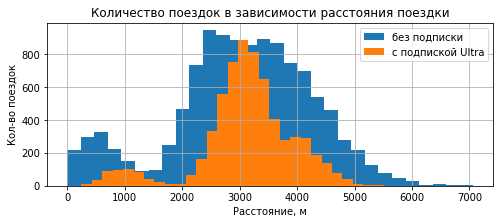

In [ ]:
# Построим график количества поездок для пользователей с подпиской и без.
df_free['distance'].plot(kind='hist', grid=True, figsize=(8,3), bins=30, label='без подписки')
df_ultra['distance'].plot(kind='hist', grid=True, figsize=(8,3), bins=30, label='с подпиской Ultra')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во поездок')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df_free['distance'].describe()

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

In [ ]:
df_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

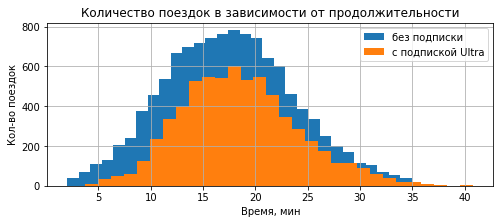

In [ ]:
df_free['duration'].plot(kind='hist', grid=True, figsize=(8,3), bins=30, label='без подписки')
df_ultra['duration'].plot(kind='hist', grid=True, figsize=(8,3), bins=30, label='с подпиской Ultra')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Время, мин')
plt.ylabel('Кол-во поездок')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df_free['duration'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

In [ ]:
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

**ВЫВОД ПО РАЗДЕЛУ:**<br/>
- В ходе проведения исследования три отдельных датафрейма были объединены в один *df_total*.
- На основе объединённого датафрейма были созданы два дополнительных: с данными о пользователях без подписки и с данными о пользователях с подпиской *ultra*.
- Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Продолжительность поездок**<br/>
Пользователи с подпиской ultra в среднем проводят в поездке немного больше времени (18.5 минут) по сравнению с пользователями без подписки (17.5 минут). Для обеих групп характерен широкий разброс значений продолжительности поездок. Минимальное время поездок для пользователей без подписки составляет (2.03 минут), для пользователей с подпиской (3.7 минут).<br/>
**Расстояние поездок**<br/>
Распределение расстояний поездок для обеих групп пользователей (с подпиской и без) имеет схожую форму, напоминающую нормальное распределение. Пользователи с подпиской ultra в среднем совершают более длинные поездки (3115 метров) по сравнению с пользователями без подписки (3028 метров). Разница, хотя и не очень большая, но статистически значима. Это говорит о том, что как пользователи с подпиской, так и без нее совершают поездки на самые разные расстояния.<br/>

### Подсчёт выручки

#### Создадим датафрейм, агрегированный по пользователям на основе df_total

Найдём для каждого пользователя, за каждый месяц: суммарное расстояние, количество поездок и суммарное время.

In [ ]:
# Округлим время поездки до целого числа в большую сторону.
df_total['duration'] = np.ceil(df_total['duration'])

In [ ]:
# Приведём тип данных к целочисленному.
df_total['duration'] = df_total['duration'].astype('int')

In [ ]:
# Создадим сводную таблицу.
df_total_agg = df_total.pivot_table(
    index=['user_id', 'month'],
    values=['distance', 'duration'],
    aggfunc=['count', 'sum'])

# Переименуем столбцы.
df_total_agg.columns = [
    'count',           # кол-во поездок за месяц
    'count_duration',
    'distance',        # суммарное растояние за месяц
    'duration'         # общая продолжительность поездок
]

# Удалим лишний столбец.
df_total_agg = df_total_agg.drop(columns=['count_duration'])
df_total_agg = df_total_agg.reset_index()
df_total_agg

,user_id,month,count,distance,duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11295,1534,6,2,3409.468534,26
11296,1534,8,2,7622.453034,48
11297,1534,9,1,4928.173852,23
11298,1534,11,4,13350.015305,78


#### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [ ]:
# Добавим столбцы с необходимыми данными.
df_total_agg = df_total_agg.merge(df_users, how='left', on='user_id')
df_total_agg = df_total_agg.merge(df_subs, how = 'left', on='subscription_type')

df_total_agg['revenue'] = (
    (df_total_agg['start_ride_price'] * df_total_agg['count'])
    + (df_total_agg['minute_price'] * df_total_agg['duration'])
    + df_total_agg['subscription_fee']
)

In [ ]:
df_total_agg

,user_id,month,count,distance,duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0,308
11296,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0,484
11297,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0,234
11298,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0,824


### Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

#### Гипотеза: "Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки?"

Необходимо выяснить, тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.<br/>

**Гипотезы:**
- **Гипотеза H0** — Среднее время поездок пользователей с подпиской и без равно.
- **Гипотеза H1** — Среднее время поездок пользователей с подпиской Ultra больше, чем без.

Проверим гипотезы, используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [ ]:
alpha = 0.05 # Уровень статистической значимости

# Проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(
    df_ultra['duration'],
    df_free['duration'],
    alternative='greater')

print(f'p-значение: {results.pvalue}') # Получившееся p-значение

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средней продолжительности поездок')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве средней продолжительности поездок')

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу о равенстве средней продолжительности поездок


**Вывод:** Проведенный статистический анализ показал, что пользователи с подпиской, в среднем, совершают более длительные поездки по сравнению с пользователями без подписки. Этот результат статистически значим на уровне 5%, что позволяет отвергнуть гипотезу о равенстве средних и сделать вывод о том, что пользователи с подпиской действительно тратят больше времени на поездки.

#### Гипотеза: "Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров"

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

**Гипотезы:**
- **Гипотеза H0** — Среднее расстояние поездок с подпиской ultra равно 3130 метров.
- **Гипотеза H1** — Среднее расстояние поездок с подпиской ultra больше 3130 метров.

Проверим гипотезы, используем исходные данные о преодолённом расстоянии для пользователей с подпиской.

In [ ]:
distance_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    df_ultra['distance'],
    distance_value,
    alternative='greater')

print(f'p-значение: {results.pvalue}') # Получившееся p-значение

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** На основе проведенного статистического анализа не было найдено достаточных оснований для утверждения, что среднее расстояние одной поездки для пользователей с подпиской "ultra" превышает оптимальное значение в 3130 метров. Нулевую гипотезу неудалось отвергнуть.

#### Гипотеза: "Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки"

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Гипотезы:**
- **Гипотеза H0** — Средняя помесячная выручка от пользователей с подпиской и без равны.
- **Гипотеза H1** — Средняя помесячная выручка от пользователей с подпиской больше, чем у пользователей без подписки.

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    df_total_agg.loc[df_total_agg['subscription_fee'] > 0, 'revenue'],
    df_total_agg.loc[df_total_agg['subscription_fee'] == 0, 'revenue'],
    alternative='greater')

print(f'p-значение: {results.pvalue}') # Получившееся p-значение

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотеза отвергнута. Предварительно можно говорить, что пользователи с подпиской приносят компании больше денег в среднем за месяц, чем те, у кого нет подписки.

#### Выбрать тест для проверки гипотезы

**Задача:** Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Возможное решение:** У нас есть данные о каждом пользователе до и после обновления серверов, то есть данные парные. Для решения этой задачи можно использовать парный t-тест. Этот метод позволит сравнить среднее количество обращений одного и того же пользователя до и после обновления серверов. Для этого подойдёт метод scipy.stats.ttest_rel(), в который мы передадим наборы данных до обновления и после.

**ВЫВОД ПО РАЗДЕЛУ:**
В ходе проверки гипотез были получены следующие выводы:
- Пользователи с подпиской, в среднем, совершают более длительные поездки по сравнению с пользователями без подписки.
- Среднее растояние, проезжаемое пользователями сервиса с подпиской, не превышает оптимального значения в 3130 метров.
- Пользователи с подпиской приносят компании больше денег в среднем за месяц, чем те, у кого нет подписки.

Модель подписки демонстрирует высокую эффективность. Подписчики более активно пользуются сервисом и приносят компании больше дохода.<br/>
Полученные результаты указывают на потенциал для дальнейшего развития подписной модели. Можно рассмотреть возможность расширения спектра подписок, разработки новых тарифных планов и персонализированных предложений для подписчиков.

### Общий вывод

В ходе исследования данных о пользователях сервиса аренды самокатов — GoFast, был проведён комплексный анализ данных сервиса аренды самокатов GoFast с целью выявления закономерностей, проверки гипотез и разработки рекомендаций для бизнеса. <br/>
<br/>
Для этого были проведены следующие этапы работ:<br/>

1. **Загрузка данных**
 - Была считана и изучена общая информация о трёх предоставленных CSV-файлов:
  - *df_users* состоит из 5 столбцов и 1565 записей. В данных отсутствуют пропуски.
  - *df_rides* состоит из 4 столбцов и 18068 записей. В данных отсутствуют пропуски. Поле *date* имеет тип данных *object*.
  - *df_subs* состоит из 4 столбцов и 2 записей.
 - Для каждого датафрейма были построены гистограммы, для визуального представления данных.

2. **Предобработка данных**
 - Датафреймы были проверены на наличие дубликатов и пропусков
  - *df_users* — Пропусков не обнаружено. Явные дубликаты в количестве 31 удалены.
  - *df_rides* — Пропусков и дубликатов не обнаружено.
  - *df_subs* — Пропусков и дубликатов не обнаружено.
 - Изменили тип данных столбца *date* датафрейма *df_rides* на datetime
 - Создали новый столбец с номером месяца на основе столбца *date*

3. **Исследовательский анализ данных**
 Выяснили:
 - В датафреймах содержатся данные о пользователях сервиса из 8 городов. Больше всего пользователей в Пятигорске (219). Меньше всего пользователей в Москве (168).
 - Количество пользователей без подписки — 835, с подпиской 'ultra' — 699
 - Средний возраст пользователей сервиса составляет 24,9. Возраст пользователей представлен в диапазоне от 12 до 43 лет.
 - За одну поездку пользователи преодолевают расстояние от 1 м до 7211 м. В данных наблюдается два пика, один в районе 600 м, второй около 3100 м. Среднее расстояние, преодолеваемое за одну поездку составляет примерно 3 километра. Медиана 3134 м. Малый пик в районе 600 метров может свидетельствовать о том, что пользователи используют поездки на самокатах, даже на короткие расстояния, от дома до магазина, до метро и т.д. Основная же масса поездок приходится на расстояния в диапазоне 2,5 до 3,5 км.
 - Продолжительность одной поездки нормально распределена от 2 ло 41 минуты. Среднее и медианные значения находятся в районе 18 минут и являются наиболее распространенными. В данных присутствовали записи поездок с продолжительностью 0.5 минут и аномально большими расстояниями поездок. Было принято решение удалить 95 записей с аномалиями.

4. **Объединение данных**
 - Объединили данные о пользователях, поездказ и подписках из разных датафреймов в один *df_total*.
 - Создали два датафрейма с пользователями с подпиской и без подписки *df_ultra* и *df_free*.
 - Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

5. **Подсчёт выручки**
 - Создали датафрейм, агрегированный по пользователям на основе *df_total*.
 - Добавили столбец *revenue* с помесячной выручкой, которую принёс каждый пользователь.

6. **Проверка гипотез**
 - Гипотеза: "Пользователи с подпиской тратят больше времени на поездки?"
 - Гипотеза: "Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров"
 - Гипотеза: "Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки"
 - Выбрать тест для проверки гипотезы

**Полученные выводы:**<br/>

- Пользователи с подпиской ultra в среднем проводят больше времени в поездке немного (18.5 минут) по сравнению с пользователями без подписки (17.5 минуты).
- Нельзя утверждать, что пользователи с подпиской в среднем проезжают более 3130 метров за одну поездку. Но значение близко к оптимальному с точки зрения износа самоката.
- Есть основания утверждать, что пользователи с подпиской приносят компании больше денег в среднем за месяц, чем те, у кого нет подписки. Этот результат является статистически значимым, что подтверждает эффективность модели подписки.

**Рекомендации:**<br/>
На основе проведённого анализа рекомендуется
- Предложить пользователям различные варианты подписки с гибкими условиями и возможностью отмены в любое время.
- Проанализировать данные о маршрутах пользователей, чтобы выявить наиболее популярные направления и оптимизировать сеть стоянок самокатов.
- Разрабатывать специальные сезонные предложения для подписчиков, чтобы повысить их лояльность.
- Активно собирать обратную связь от пользователей и использовать ее для улучшения сервиса.